Dengan data yang telah dimasukkan:
Banyaknya pakaian = 75
Tingkat kekotoran = 55
Kecepatan putar mesin cuci: 862.1071428571425


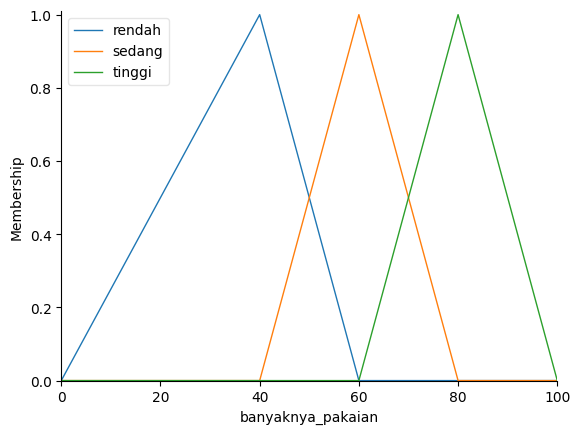

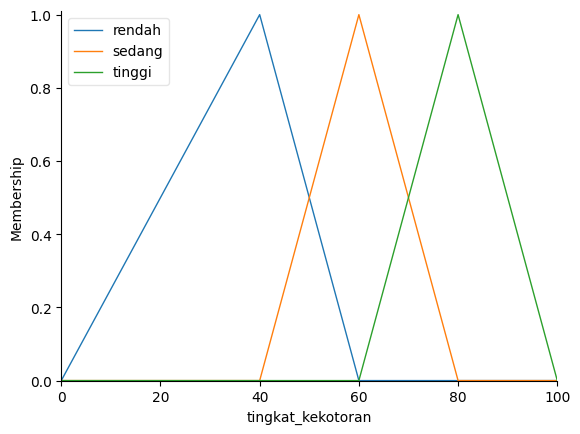

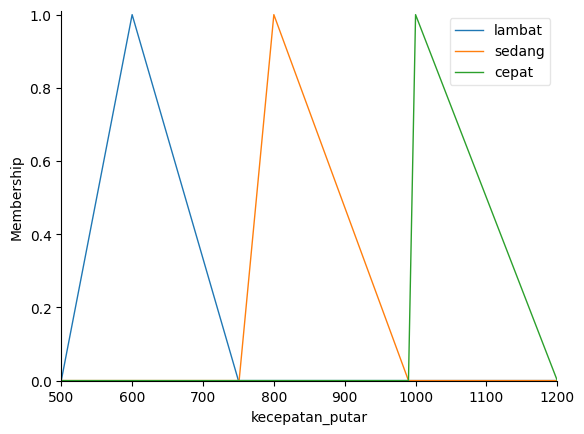

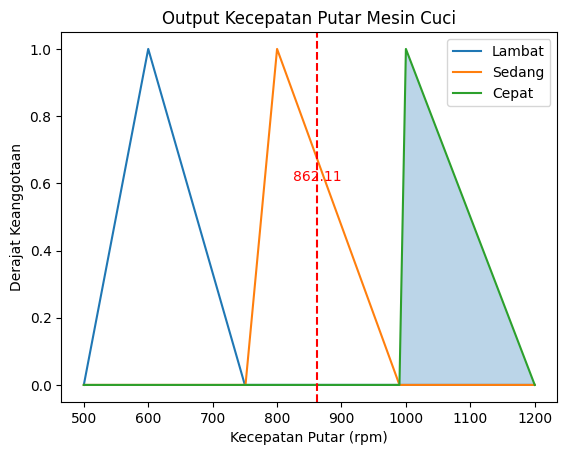

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

#  Created By : Alfian Wahyu

# Menentukan variabel fuzzy
banyaknya_pakaian = ctrl.Antecedent(np.arange(0, 101, 1), 'banyaknya_pakaian')
tingkat_kekotoran = ctrl.Antecedent(np.arange(0, 101, 1), 'tingkat_kekotoran')
kecepatan_putar = ctrl.Consequent(np.arange(500, 1201, 1), 'kecepatan_putar')

# Mendefinisikan  untuk setiap variabel
# Variabel banyaknya_pakaian
banyaknya_pakaian['rendah'] = fuzz.trimf(
    banyaknya_pakaian.universe, [0, 40, 60])
banyaknya_pakaian['sedang'] = fuzz.trimf(
    banyaknya_pakaian.universe, [40, 60, 80])
banyaknya_pakaian['tinggi'] = fuzz.trimf(
    banyaknya_pakaian.universe, [60, 80, 100])

# Variabel tingkat_kekotoran
tingkat_kekotoran['rendah'] = fuzz.trimf(
    tingkat_kekotoran.universe, [0, 40, 60])
tingkat_kekotoran['sedang'] = fuzz.trimf(
    tingkat_kekotoran.universe, [40, 60, 80])
tingkat_kekotoran['tinggi'] = fuzz.trimf(
    tingkat_kekotoran.universe, [60, 80, 100])

# Variabel kecepatan_putar
kecepatan_putar['lambat'] = fuzz.trimf(
    kecepatan_putar.universe, [500, 600, 750])
kecepatan_putar['sedang'] = fuzz.trimf(
    kecepatan_putar.universe, [751, 800, 990])
kecepatan_putar['cepat'] = fuzz.trimf(
    kecepatan_putar.universe, [990, 1000, 1200])

# Rule - rule fuzzy
rule1 = ctrl.Rule(banyaknya_pakaian['rendah'] &
                  tingkat_kekotoran['rendah'], kecepatan_putar['lambat'])
rule2 = ctrl.Rule(banyaknya_pakaian['sedang'] &
                  tingkat_kekotoran['sedang'], kecepatan_putar['sedang'])
rule3 = ctrl.Rule(banyaknya_pakaian['tinggi'] &
                  tingkat_kekotoran['tinggi'], kecepatan_putar['cepat'])

# Sistem kontrol utama dalam fuzzy
sistem_kontrol = ctrl.ControlSystem([rule1, rule2, rule3])
mesin_cuci = ctrl.ControlSystemSimulation(sistem_kontrol)

# Inputan
mesin_cuci.input['banyaknya_pakaian'] = 55
mesin_cuci.input['tingkat_kekotoran'] = 25

# Melakukan perhitungan
mesin_cuci.compute()

# Mendapatkan hasil output
kecepatan_putar_mesin = mesin_cuci.output['kecepatan_putar']

# Menampilkan hasil output berbasis command
print("Dengan data yang telah dimasukkan:")
print("Banyaknya pakaian =", mesin_cuci.input['banyaknya_pakaian'])
print("Tingkat kekotoran =", mesin_cuci.input['tingkat_kekotoran'])
print("Kecepatan putar mesin cuci:", kecepatan_putar_mesin)

# Visualisasi variabel banyaknya_pakaian
banyaknya_pakaian.view()

# Visualisasi variabel tingkat_kekotoran
tingkat_kekotoran.view()

# Visualisasi variabel kecepatan_putar
kecepatan_putar.view()

# Visualisasi hasil output
plt.figure()
plt.plot(kecepatan_putar.universe,
         kecepatan_putar['lambat'].mf, label='Lambat')
plt.plot(kecepatan_putar.universe,
         kecepatan_putar['sedang'].mf, label='Sedang')
plt.plot(kecepatan_putar.universe, kecepatan_putar['cepat'].mf, label='Cepat')
plt.legend()
plt.xlabel('Kecepatan Putar (rpm)')
plt.ylabel('Derajat Keanggotaan')
plt.title('Output Kecepatan Putar Mesin Cuci')

# Menampilkan titik hasil output
plt.axvline(x=kecepatan_putar_mesin, color='red', linestyle='--')
plt.text(kecepatan_putar_mesin, 0.6,
         f'{kecepatan_putar_mesin:.2f}', color='red', va='bottom', ha='center')

plt.show()
